# **Тема проекта**
## Анализ рынка труда в сфере ИИ и технологий: выявление закономерностей и построение рекомендаций на основе вакансий.

---





# **Бизнес-задача**

## В рамках анализа предоставленного датасета необходимо:

## 1.   Определить ключевые факторы, влияющие на зарплаты специалистов в сфере ИИ и технологий
## 2.   Проанализировать спрос на различные профессии, уровни опыта, типы занятости и удалённой работы
## 3.   Построить рекомендации для соискателей и работодателей: какие навыки и позиции наиболее востребованы, какие регионы предлагают лучшие условия

---





# **Контекст и цель анализа**

## Рынок труда в сфере ИИ развивается стремительно. Появляются новые профессии, меняется структура занятости, возрастает конкуренция. Благодаря датасету с реальными вакансиями можно:
## 1.   Изучить реальные тренды в отрасли
## 2.   Построить “портрет” типичной вакансии в ИИ
## 3.   Предложить практические рекомендации соискателям и HR-специалистам

---





# **Предобработка данных**

### Этап 1. Импорт библиотек

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Проверка чтения и исполнения файла

In [2]:
data = pd.read_csv('ai_job_market_insights.csv')

In [3]:
data.shape

(500, 10)

### Этап 2. Ознакомление с данными

In [4]:
# 2.1 Первые строки
data.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93793,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93028,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87753,Yes,Decline


In [5]:
# 2.2 Последние строки
data.tail()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119795,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79645,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642,Yes,Stable
499,HR Manager,Entertainment,Medium,Berlin,Medium,High,Project Management,68764,Yes,Decline


In [6]:
# 2.3 Случайная выборка строк
data.sample(7)

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
393,UX Designer,Manufacturing,Medium,Dubai,High,Medium,Marketing,85157,No,Decline
137,Sales Manager,Manufacturing,Large,San Francisco,Medium,Low,Machine Learning,103759,Yes,Growth
332,UX Designer,Manufacturing,Medium,Paris,Low,High,Communication,97763,Yes,Decline
241,HR Manager,Energy,Large,Toronto,High,Low,Sales,71855,No,Decline
92,Sales Manager,Finance,Large,Paris,Low,Medium,Python,93003,No,Decline
427,Sales Manager,Energy,Small,Singapore,Low,High,Sales,116857,Yes,Stable
376,Marketing Specialist,Education,Medium,Singapore,High,High,Communication,102926,Yes,Stable


In [7]:
# 2.4 Общая информация о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Job_Title              500 non-null    object
 1   Industry               500 non-null    object
 2   Company_Size           500 non-null    object
 3   Location               500 non-null    object
 4   AI_Adoption_Level      500 non-null    object
 5   Automation_Risk        500 non-null    object
 6   Required_Skills        500 non-null    object
 7   Salary_USD             500 non-null    int64 
 8   Remote_Friendly        500 non-null    object
 9   Job_Growth_Projection  500 non-null    object
dtypes: int64(1), object(9)
memory usage: 39.2+ KB


In [8]:
# 2.5 Размер датафрейма
print("Размер датафрейма:", data.shape)

Размер датафрейма: (500, 10)


In [9]:
# 2.6 Статистика по числовым столбцам
data.describe()

,Salary_USD
count,500.000000
mean,91222.424000
std,20504.274931
min,31970.000000
25%,78511.250000
50%,91998.000000
75%,103971.750000
max,155210.000000


In [10]:
# 2.7 Использование памяти
data.memory_usage(deep=True)

,0
Index,132
Job_Title,36021
Industry,33799
Company_Size,31163
Location,32087
AI_Adoption_Level,30684
Automation_Risk,30688
Required_Skills,34283
Salary_USD,4000
Remote_Friendly,29751


### Этап 3. Перевод к "Змеиному стилю", нижнему регистру

In [11]:
#Перевод наименований столбцов к нижнему регистру
print("До выполнения перевода:", data.columns.tolist())

data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

print("После выполнения перевода:", data.columns.tolist())

До выполнения перевода: ['Job_Title', 'Industry', 'Company_Size', 'Location', 'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD', 'Remote_Friendly', 'Job_Growth_Projection']
После выполнения перевода: ['job_title', 'industry', 'company_size', 'location', 'ai_adoption_level', 'automation_risk', 'required_skills', 'salary_usd', 'remote_friendly', 'job_growth_projection']


In [12]:
#Приведение всего текста к нижнему регистру
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.lower()

### Этап 4. Проверка датафрейма на пропуски

In [13]:
data.isnull().sum()

,0
job_title,0
industry,0
company_size,0
location,0
ai_adoption_level,0
automation_risk,0
required_skills,0
salary_usd,0
remote_friendly,0
job_growth_projection,0


Пропусков не обнаружено

### Этап 5. Изменение типов данных

In [14]:
data['salary_usd'] = data['salary_usd'].astype(int)

Зарплата приведена к числовому формату

### Этап 6.  Поиск и удаление дубликатов

In [15]:
# Количество дубликатов
print("Дубликатов обнаружено:", data.duplicated().sum())

Дубликатов обнаружено: 0


Дубликатов не обнаружено

### Этап 7. Промежуточные выводы по работе

- Ознакомление с данными выполнены
- В ходе беглого осмотра критических проблем не выявлено, из небольших проблем можно выявить то, что столбик с заработной платой нужно перевести к числовому типу данных. Также необходимо привести данные к «змеиному стилю», т.е. нижнему соответственно
- Проведено соответствие «змеиному стилю»
- Наименования столбцов и весь текст приведено к единому (нижнему) регистру
- Проведена проверка датафрейма на пропуски
- Типы данных изменены (Заработная плата к числовому)
- Выполнен поиск дубликатов

# **Исследовательский анализ данных**

### Этап 1. Индексикация по координаторам и логическая индексикация

In [16]:
# 1. Все вакансии, где зарплата выше 100000
data[data["salary_usd"] > 100000]

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
0,cybersecurity analyst,entertainment,small,dubai,medium,high,ux/ui design,111392,yes,growth
2,ai researcher,technology,large,singapore,medium,high,ux/ui design,107170,yes,growth
5,ux designer,education,large,san francisco,medium,medium,cybersecurity,102825,no,growth
6,hr manager,finance,medium,singapore,low,high,sales,102066,yes,growth
14,product manager,finance,medium,singapore,high,high,javascript,101002,yes,growth
...,...,...,...,...,...,...,...,...,...,...
481,ux designer,healthcare,medium,tokyo,medium,medium,ux/ui design,126678,no,growth
488,marketing specialist,retail,small,berlin,high,high,python,113977,no,decline
492,ai researcher,education,large,san francisco,low,medium,cybersecurity,119962,no,growth
495,data scientist,telecommunications,medium,berlin,low,medium,machine learning,105821,yes,stable


In [17]:
# 2. Уровень ИИ высокий
data[data["ai_adoption_level"] == "high"]

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
8,ai researcher,retail,large,london,high,low,javascript,75016,no,stable
9,sales manager,entertainment,medium,singapore,high,low,cybersecurity,96835,yes,decline
10,marketing specialist,finance,small,london,high,high,python,91567,yes,growth
12,ai researcher,transportation,large,san francisco,high,medium,python,73152,yes,growth
14,product manager,finance,medium,singapore,high,high,javascript,101002,yes,growth
...,...,...,...,...,...,...,...,...,...,...
484,ai researcher,retail,small,tokyo,high,low,communication,72034,no,growth
485,hr manager,retail,small,singapore,high,medium,data analysis,79805,no,decline
488,marketing specialist,retail,small,berlin,high,high,python,113977,no,decline
497,cybersecurity analyst,energy,large,dubai,high,low,ux/ui design,79645,yes,stable


In [18]:
# 3. Вакансии в Японии
data[data["location"] == "tokyo"]

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
4,cybersecurity analyst,entertainment,small,tokyo,low,low,javascript,87753,yes,decline
17,ai researcher,manufacturing,large,tokyo,low,high,project management,73395,no,stable
22,ux designer,retail,small,tokyo,high,medium,cybersecurity,41496,no,decline
26,ux designer,transportation,large,tokyo,medium,high,ux/ui design,95763,no,decline
27,hr manager,manufacturing,small,tokyo,high,low,cybersecurity,73323,yes,growth
46,software engineer,telecommunications,small,tokyo,high,medium,cybersecurity,92269,no,growth
51,data scientist,finance,large,tokyo,medium,low,sales,92027,no,growth
58,product manager,entertainment,large,tokyo,medium,high,machine learning,108280,yes,growth
78,data scientist,entertainment,small,tokyo,low,low,marketing,125422,yes,decline
121,ux designer,education,medium,tokyo,high,low,project management,89687,no,growth


In [19]:
# 4. Удаленная работа
data[data["remote_friendly"] == "yes"]

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
0,cybersecurity analyst,entertainment,small,dubai,medium,high,ux/ui design,111392,yes,growth
2,ai researcher,technology,large,singapore,medium,high,ux/ui design,107170,yes,growth
4,cybersecurity analyst,entertainment,small,tokyo,low,low,javascript,87753,yes,decline
6,hr manager,finance,medium,singapore,low,high,sales,102066,yes,growth
7,cybersecurity analyst,technology,small,dubai,medium,low,machine learning,86607,yes,decline
...,...,...,...,...,...,...,...,...,...,...
494,sales manager,transportation,medium,tokyo,medium,high,sales,97623,yes,growth
495,data scientist,telecommunications,medium,berlin,low,medium,machine learning,105821,yes,stable
497,cybersecurity analyst,energy,large,dubai,high,low,ux/ui design,79645,yes,stable
498,operations manager,healthcare,large,paris,high,low,python,77642,yes,stable


In [20]:
# 5. Вакансии в Data Science
data[data["job_title"].str.contains("data scientist", case=False)]

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
21,data scientist,manufacturing,small,dubai,medium,high,javascript,81794,yes,growth
25,data scientist,entertainment,medium,sydney,low,low,sales,112234,yes,stable
51,data scientist,finance,large,tokyo,medium,low,sales,92027,no,growth
78,data scientist,entertainment,small,tokyo,low,low,marketing,125422,yes,decline
83,data scientist,education,small,san francisco,high,low,data analysis,105370,no,stable
...,...,...,...,...,...,...,...,...,...,...
453,data scientist,telecommunications,large,singapore,low,low,sales,74654,no,growth
461,data scientist,technology,large,dubai,medium,high,sales,48518,no,decline
486,data scientist,telecommunications,large,berlin,medium,medium,sales,73693,yes,growth
490,data scientist,energy,large,sydney,medium,low,cybersecurity,95170,yes,decline


In [21]:
# 6. Вакансии с зарплатой выше 150000 USD и высоким уровнем ИИ
high_salary_highAI = data[(data["salary_usd"] > 150000) & (data["ai_adoption_level"] == "high")]
high_salary_highAI.head()

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
420,marketing specialist,finance,medium,san francisco,high,high,sales,155210,yes,decline


In [22]:
# 7. Вакансии с удаленной занятостью и низким уровнем автоматизации
remote_low = data[(data["remote_friendly"] == "yes") & (data["automation_risk"] == "low")]
remote_low.head()

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
4,cybersecurity analyst,entertainment,small,tokyo,low,low,javascript,87753,yes,decline
7,cybersecurity analyst,technology,small,dubai,medium,low,machine learning,86607,yes,decline
9,sales manager,entertainment,medium,singapore,high,low,cybersecurity,96835,yes,decline
19,software engineer,entertainment,small,dubai,low,low,ux/ui design,73920,yes,growth
20,sales manager,retail,medium,sydney,medium,low,javascript,134823,yes,decline


In [23]:
# 8. Вакансии для маркетинг специалистов в большой компании
large_marketing = data[(data["company_size"] == "large") & (data["required_skills"] == "marketing")]
large_marketing.head()

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
1,marketing specialist,technology,large,singapore,medium,high,marketing,93793,no,decline
122,hr manager,technology,large,tokyo,medium,medium,marketing,87985,no,decline
135,ux designer,energy,large,singapore,high,low,marketing,112465,no,growth
141,cybersecurity analyst,education,large,tokyo,low,medium,marketing,96198,no,stable
172,sales manager,manufacturing,large,sydney,medium,high,marketing,80201,yes,decline


In [24]:
# 9. Вакансии в США или Германии с зарплатой выше 100000
rich_us_germ = data[(data["location"].isin(["new york", "berlin"])) & (data["salary_usd"] > 100000)]
rich_us_germ.head()

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
38,software engineer,telecommunications,small,new york,high,high,python,103458,yes,stable
43,operations manager,telecommunications,small,new york,medium,medium,project management,129294,no,stable
48,cybersecurity analyst,manufacturing,large,berlin,medium,low,cybersecurity,100288,no,decline
67,ai researcher,finance,small,new york,low,high,javascript,111957,yes,growth
80,cybersecurity analyst,entertainment,medium,berlin,medium,low,sales,101820,no,growth


In [25]:
# 10. Вакансии с должностью Ai researcher в маленькой компании
small_data_engineer = data[(data["job_title"].str.contains("ai researcher", case=False)) & (data["company_size"] == "small")]
small_data_engineer.head()

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
67,ai researcher,finance,small,new york,low,high,javascript,111957,yes,growth
74,ai researcher,entertainment,small,toronto,medium,low,marketing,114881,yes,stable
84,ai researcher,manufacturing,small,berlin,high,medium,python,115239,no,decline
243,ai researcher,finance,small,dubai,medium,medium,javascript,126267,no,growth
245,ai researcher,healthcare,small,tokyo,low,high,data analysis,117937,yes,growth


In [49]:
# 11. Вакансии, в которых упоминается Python и уровень внедрения ИИ высокий
data.loc[
    (data['required_skills'].str.contains('python', case=False, na=False)) &
    (data['ai_adoption_level'] == 'high')
]

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection,has_ai_skill
10,marketing specialist,finance,small,london,high,high,python,91567,yes,growth,True
12,ai researcher,transportation,large,san francisco,high,medium,python,73152,yes,growth,True
38,software engineer,telecommunications,small,new york,high,high,python,103458,yes,stable,True
84,ai researcher,manufacturing,small,berlin,high,medium,python,115239,no,decline,True
101,data scientist,education,medium,sydney,high,low,python,129632,no,growth,True
109,hr manager,energy,small,new york,high,medium,python,97555,yes,stable,True
133,product manager,healthcare,large,london,high,high,python,58865,yes,stable,True
142,operations manager,technology,small,dubai,high,high,python,89411,no,growth,True
155,sales manager,manufacturing,medium,berlin,high,low,python,70100,yes,stable,True
156,data scientist,transportation,large,berlin,high,high,python,100520,no,decline,True


In [52]:
# 12. Профессии, встречающиеся в крупных компаниях, но с низким уровнем внедрения ИИ
data.loc[
    (data['company_size'] == 'large') &
    (data['ai_adoption_level'] == 'low')
]

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection,has_ai_skill
17,ai researcher,manufacturing,large,tokyo,low,high,project management,73395,no,stable,False
29,marketing specialist,telecommunications,large,san francisco,low,medium,python,96548,yes,growth,True
33,hr manager,finance,large,london,low,medium,machine learning,118341,yes,stable,True
35,sales manager,healthcare,large,dubai,low,medium,javascript,102592,yes,growth,False
44,ux designer,entertainment,large,singapore,low,medium,python,73836,no,decline,True
59,ux designer,retail,large,toronto,low,medium,project management,71031,yes,stable,False
69,operations manager,finance,large,san francisco,low,low,project management,76168,no,stable,False
85,ai researcher,education,large,new york,low,high,sales,93594,no,growth,False
90,hr manager,manufacturing,large,new york,low,medium,python,95958,yes,stable,True
92,sales manager,finance,large,paris,low,medium,python,93003,no,decline,True


In [53]:
# 13. Показать первые 5 строк, начиная с 10-й
data.iloc[10:15]

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection,has_ai_skill
10,marketing specialist,finance,small,london,high,high,python,91567,yes,growth,True
11,ai researcher,entertainment,medium,singapore,medium,high,ux/ui design,78903,no,growth,False
12,ai researcher,transportation,large,san francisco,high,medium,python,73152,yes,growth,True
13,hr manager,retail,small,paris,low,high,cybersecurity,98210,yes,decline,False
14,product manager,finance,medium,singapore,high,high,javascript,101002,yes,growth,False


In [54]:
# 14. Показать только значения 2-го, 4-го и 6-го столбцов в строках с 0 по 4
data.iloc[0:5, [1, 3, 5]]

,industry,location,automation_risk
0,entertainment,dubai,high
1,technology,singapore,high
2,technology,singapore,high
3,retail,berlin,high
4,entertainment,tokyo,low


In [57]:
# 15. Вакансии, где профессия — Data Sciensist или Software Engineer и уровень ИИ — High
data.loc[
    (data['job_title'].isin(['data sciensist', 'software engineer'])) &
    (data['ai_adoption_level'] == 'high')
]

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection,has_ai_skill
16,software engineer,manufacturing,medium,singapore,high,medium,machine learning,78401,no,decline,True
38,software engineer,telecommunications,small,new york,high,high,python,103458,yes,stable,True
46,software engineer,telecommunications,small,tokyo,high,medium,cybersecurity,92269,no,growth,False
62,software engineer,finance,small,san francisco,high,medium,ux/ui design,56076,no,growth,False
72,software engineer,retail,medium,sydney,high,medium,cybersecurity,52244,yes,stable,False
185,software engineer,healthcare,small,sydney,high,low,python,94839,no,decline,True
218,software engineer,manufacturing,small,singapore,high,high,marketing,61885,no,decline,False
261,software engineer,technology,large,new york,high,low,machine learning,84124,no,growth,True
319,software engineer,finance,medium,san francisco,high,high,project management,85333,yes,decline,False
396,software engineer,entertainment,large,sydney,high,high,javascript,61858,no,growth,False


### Этап 2. Сортировка данных (по столбцам)

In [26]:
# 1. Топ-20 вакансий с самой высокой зарплатой
high_paid_jobs = data.sort_values(by="salary_usd", ascending=False).head(20)
high_paid_jobs

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
420,marketing specialist,finance,medium,san francisco,high,high,sales,155210,yes,decline
289,data scientist,healthcare,medium,paris,high,low,python,148467,yes,stable
361,ux designer,energy,small,sydney,low,high,python,140476,yes,growth
341,operations manager,entertainment,medium,berlin,low,low,communication,139078,yes,decline
232,software engineer,finance,large,singapore,low,medium,project management,138448,yes,growth
132,hr manager,entertainment,small,san francisco,low,medium,machine learning,135779,no,decline
143,cybersecurity analyst,healthcare,large,san francisco,high,low,javascript,135567,yes,stable
20,sales manager,retail,medium,sydney,medium,low,javascript,134823,yes,decline
362,product manager,telecommunications,medium,tokyo,low,low,python,133107,yes,growth
98,operations manager,technology,small,berlin,medium,medium,python,132529,yes,growth


In [27]:
# 2. Сортировка по уровню внедрения ИИ
adoption_sort = data.sort_values(by=["ai_adoption_level","job_title"], ascending=[False, True])
adoption_sort.head(10)

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
2,ai researcher,technology,large,singapore,medium,high,ux/ui design,107170,yes,growth
11,ai researcher,entertainment,medium,singapore,medium,high,ux/ui design,78903,no,growth
74,ai researcher,entertainment,small,toronto,medium,low,marketing,114881,yes,stable
82,ai researcher,technology,large,berlin,medium,high,ux/ui design,97116,no,growth
88,ai researcher,education,medium,paris,medium,high,project management,80563,no,stable
99,ai researcher,technology,medium,toronto,medium,high,sales,98660,yes,growth
153,ai researcher,finance,medium,toronto,medium,low,cybersecurity,105188,yes,stable
161,ai researcher,education,large,sydney,medium,high,data analysis,100575,yes,growth
192,ai researcher,manufacturing,medium,san francisco,medium,high,marketing,99743,no,decline
219,ai researcher,retail,large,san francisco,medium,high,data analysis,71375,no,stable


In [28]:
# 3. Сортировка по job_title и зарплате одновременно
sorted_jobs = data.sort_values(by=["job_title", "salary_usd"], ascending=[False, False])
sorted_jobs.head(10)

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
361,ux designer,energy,small,sydney,low,high,python,140476,yes,growth
481,ux designer,healthcare,medium,tokyo,medium,medium,ux/ui design,126678,no,growth
378,ux designer,retail,small,dubai,high,low,machine learning,123993,no,decline
466,ux designer,education,large,tokyo,low,high,javascript,121895,no,growth
354,ux designer,education,small,singapore,low,medium,project management,117491,no,decline
407,ux designer,healthcare,large,dubai,high,medium,project management,116519,no,decline
225,ux designer,retail,medium,berlin,medium,low,cybersecurity,116208,no,growth
135,ux designer,energy,large,singapore,high,low,marketing,112465,no,growth
356,ux designer,energy,small,berlin,low,medium,marketing,110153,no,growth
416,ux designer,finance,small,tokyo,medium,medium,cybersecurity,109987,no,decline


In [29]:
# 4. Сортировка по стране и зарплате
location_salary = data.sort_values(by=["location", "salary_usd"], ascending=[False, True])
location_salary.head(10)

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
200,product manager,transportation,small,toronto,high,medium,project management,53511,no,growth
300,sales manager,technology,large,toronto,high,medium,project management,60217,no,growth
400,sales manager,finance,medium,toronto,low,low,machine learning,60437,no,growth
450,sales manager,transportation,large,toronto,low,high,project management,62277,yes,growth
310,hr manager,finance,medium,toronto,high,medium,machine learning,65462,no,decline
377,software engineer,manufacturing,large,toronto,medium,low,communication,67647,no,decline
59,ux designer,retail,large,toronto,low,medium,project management,71031,yes,stable
50,hr manager,education,medium,toronto,high,medium,cybersecurity,71484,yes,stable
241,hr manager,energy,large,toronto,high,low,sales,71855,no,decline
445,software engineer,transportation,large,toronto,high,high,ux/ui design,72668,no,stable


In [30]:
# 5. Сортировка по стабильности рабочих мест
job_growth = data.sort_values(by=["job_growth_projection"], ascending=[False])
job_growth.head(10)

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
188,product manager,finance,large,paris,high,medium,machine learning,114894,yes,stable
113,hr manager,retail,large,toronto,low,low,ux/ui design,98329,yes,stable
184,hr manager,telecommunications,medium,sydney,low,low,project management,75379,no,stable
442,data scientist,energy,large,new york,medium,high,marketing,127392,no,stable
438,marketing specialist,technology,small,san francisco,medium,low,marketing,106178,no,stable
437,sales manager,technology,small,san francisco,medium,low,cybersecurity,91706,no,stable
194,product manager,technology,large,new york,medium,medium,ux/ui design,98828,yes,stable
195,ai researcher,transportation,medium,singapore,high,medium,sales,72701,yes,stable
436,ai researcher,entertainment,small,sydney,high,medium,marketing,119755,no,stable
199,product manager,finance,large,sydney,medium,low,javascript,124041,no,stable


Выводы по результатам сортировки:


1.   Самые высокооплачиваемые вакансии — это data scientist, operations manager, product manager, hr manager

2.   Уровень внедрения ИИ у профессиии Ai researcher не ниже среднего

3.   Наивысшая зарплата для вакансии ux designer 140476 USD

4.   Самая низкоплачиваемая вакансия в Торонто это product manager с зарплатой 53511 USD

5.   Самые стабильные рабочие места у hr manager и product manager


### Этап 3. Фильтрация через query и where

In [31]:
# 1. Вакансии в Нью Йорке с зарплатой выше 90000
data.query("location == 'new york' and salary_usd > 90000").head()

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
38,software engineer,telecommunications,small,new york,high,high,python,103458,yes,stable
43,operations manager,telecommunications,small,new york,medium,medium,project management,129294,no,stable
67,ai researcher,finance,small,new york,low,high,javascript,111957,yes,growth
85,ai researcher,education,large,new york,low,high,sales,93594,no,growth
87,data scientist,manufacturing,small,new york,high,medium,cybersecurity,105779,no,decline


In [32]:
# 2. Вакансии в сфере здоровья в ОАЭ
data.query("industry == 'healthcare' and location == 'dubai'").head()

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
35,sales manager,healthcare,large,dubai,low,medium,javascript,102592,yes,growth
70,ai researcher,healthcare,large,dubai,high,medium,sales,67469,yes,stable
136,operations manager,healthcare,large,dubai,medium,medium,communication,96032,no,stable
180,cybersecurity analyst,healthcare,large,dubai,medium,medium,cybersecurity,89856,yes,decline
189,cybersecurity analyst,healthcare,medium,dubai,medium,medium,machine learning,51677,no,decline


In [33]:
# 3. Только высокий уровень автоматизации и зарплата ниже 60000
data.query("automation_risk == 'high' and salary_usd <= 60000").head()

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
120,ux designer,retail,medium,dubai,medium,high,machine learning,58580,yes,growth
133,product manager,healthcare,large,london,high,high,python,58865,yes,stable
215,data scientist,telecommunications,small,sydney,low,high,javascript,57499,yes,decline
231,data scientist,healthcare,medium,london,medium,high,data analysis,45849,yes,growth
257,hr manager,manufacturing,large,paris,low,high,machine learning,55016,yes,decline


In [34]:
# 4. Вакансии в Токио или Сиднее с зарплатой от 90000
data.query("location in ['tokyo', 'sydney'] and salary_usd >= 90000").head()

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
20,sales manager,retail,medium,sydney,medium,low,javascript,134823,yes,decline
25,data scientist,entertainment,medium,sydney,low,low,sales,112234,yes,stable
26,ux designer,transportation,large,tokyo,medium,high,ux/ui design,95763,no,decline
46,software engineer,telecommunications,small,tokyo,high,medium,cybersecurity,92269,no,growth
49,ai researcher,manufacturing,medium,sydney,high,medium,marketing,101794,no,stable


In [35]:
# 5. Вакансии с удаленной занятности и с требования к знанию javascript
data.query("remote_friendly == 'yes' and required_skills == 'javascript' ").head()

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
4,cybersecurity analyst,entertainment,small,tokyo,low,low,javascript,87753,yes,decline
14,product manager,finance,medium,singapore,high,high,javascript,101002,yes,growth
20,sales manager,retail,medium,sydney,medium,low,javascript,134823,yes,decline
21,data scientist,manufacturing,small,dubai,medium,high,javascript,81794,yes,growth
35,sales manager,healthcare,large,dubai,low,medium,javascript,102592,yes,growth


In [36]:
# 6. Data Scientist с удаленной занятностью
data.where(data["job_title"].str.contains("data scientist", case=False) & (data["remote_friendly"] == 'yes')).dropna().head()

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
21,data scientist,manufacturing,small,dubai,medium,high,javascript,81794.0,yes,growth
25,data scientist,entertainment,medium,sydney,low,low,sales,112234.0,yes,stable
78,data scientist,entertainment,small,tokyo,low,low,marketing,125422.0,yes,decline
91,data scientist,retail,large,sydney,high,medium,ux/ui design,101326.0,yes,decline
114,data scientist,telecommunications,large,berlin,low,medium,cybersecurity,96021.0,yes,growth


In [37]:
# 7. Вакансии в сфере телекоммуникаций и зарплатой выше 80000
data.where((data["industry"] == "telecommunications") & (data["salary_usd"] > 80000)).dropna().head()

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
15,sales manager,telecommunications,small,dubai,high,low,ux/ui design,82799.0,no,growth
28,cybersecurity analyst,telecommunications,small,new york,high,high,marketing,84272.0,yes,stable
29,marketing specialist,telecommunications,large,san francisco,low,medium,python,96548.0,yes,growth
31,hr manager,telecommunications,large,london,medium,high,data analysis,116772.0,yes,stable
37,cybersecurity analyst,telecommunications,small,dubai,low,high,project management,101463.0,yes,stable


In [38]:
# 8. Вакансии sales manager с прогрессирующим ростом
data.where((data["job_title"] == "sales manager") & (data["job_growth_projection"] == "growth")).dropna().head()

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
3,sales manager,retail,small,berlin,low,high,project management,93028.0,no,growth
15,sales manager,telecommunications,small,dubai,high,low,ux/ui design,82799.0,no,growth
32,sales manager,manufacturing,large,paris,medium,low,machine learning,73377.0,no,growth
35,sales manager,healthcare,large,dubai,low,medium,javascript,102592.0,yes,growth
45,sales manager,healthcare,large,singapore,medium,medium,data analysis,93086.0,no,growth


In [39]:
# 9. Вакансии в маленькой компании с высоким уровнем внедрения ИИ
data.where((data["company_size"] == "small") & (data["ai_adoption_level"] == "high")).dropna().head()

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
10,marketing specialist,finance,small,london,high,high,python,91567.0,yes,growth
15,sales manager,telecommunications,small,dubai,high,low,ux/ui design,82799.0,no,growth
22,ux designer,retail,small,tokyo,high,medium,cybersecurity,41496.0,no,decline
27,hr manager,manufacturing,small,tokyo,high,low,cybersecurity,73323.0,yes,growth
28,cybersecurity analyst,telecommunications,small,new york,high,high,marketing,84272.0,yes,stable


In [40]:
# 10. Вакансии в Лондоне с низким уровнем автоматизации и зарлатой ниже 100000
data.where((data["location"] == "london") & (data["automation_risk"] == "low") & (data["salary_usd"] < 100000)).dropna().head()

,job_title,industry,company_size,location,ai_adoption_level,automation_risk,required_skills,salary_usd,remote_friendly,job_growth_projection
8,ai researcher,retail,large,london,high,low,javascript,75016.0,no,stable
41,software engineer,transportation,small,london,low,low,ux/ui design,78250.0,yes,growth
54,ai researcher,education,medium,london,high,low,communication,93530.0,yes,decline
71,sales manager,telecommunications,medium,london,high,low,data analysis,80636.0,yes,decline
125,marketing specialist,manufacturing,small,london,high,low,marketing,74286.0,no,decline


### Этап 4. Сводные таблицы

In [41]:
# 1. Средняя зарплата по отраслям
pivot_industry_salary = data.pivot_table(
    values='salary_usd',
    index='industry',
    aggfunc='mean'
).sort_values(by='salary_usd', ascending=False)

pivot_industry_salary.head()

,salary_usd
industry,
finance,94355.528302
entertainment,94291.255319
education,93798.578947
energy,92763.959184
healthcare,91688.547619


In [42]:
# 2. Средняя зарплата по уровню внедрения ИИ
pivot_ai_adoption_salary = data.pivot_table(
    values='salary_usd',
    index='ai_adoption_level',
    aggfunc='mean'
).sort_values(by='salary_usd', ascending=False)

pivot_ai_adoption_salary.head()

,salary_usd
ai_adoption_level,
low,93353.626437
medium,92139.156425
high,87583.482993


In [43]:
# 3. Количество вакансий по уровню риска автоматизации
pivot_automation_risk_count = data.pivot_table(
    values='job_title',
    index='automation_risk',
    aggfunc='count'
).rename(columns={'job_title': 'vacancy_count'}).sort_values(by='vacancy_count', ascending=False)

pivot_automation_risk_count.head()

,vacancy_count
automation_risk,
medium,173
high,169
low,158


Выводы по результатам сводных таблиц:


1.   Наиболее высокооплачиваемые отрасли — финансы, развлечения и образование. Это связано с высокой конкуренцией и уровнем квалификации.

2.   Компаниям с низким уровнем внедрения ИИ платят больше. Наиболее вероятная причина — такие компании нуждаются в квалифицированных специалистах для цифровой трансформации и готовы выплачивать больше.

3.   Больше всего вакансий относятся к профессиям со средним и высоким риском автоматизации. Это подчеркивает актуальность переобучения и развития навыков, устойчивых к автоматизации.



### Этап 5. Группировка данных и вычисление агрегатных функций

In [44]:
# 1. Средняя и максимальная зарплата по уровню автоматизации
grouped_automation_risk = data.groupby("automation_risk").agg({
    "salary_usd": ["mean", "max"]
}).sort_values(by=("salary_usd", "mean"), ascending=False)

grouped_automation_risk.head()

salary_usd        
                         mean     max
automation_risk                      
high             93907.568047  155210
low              92112.481013  148467
medium           87786.479769  138448

In [45]:
# 2. Количество вакансий и средняя зарплата по странам
grouped_country = data.groupby("location").agg({
    "job_title": "count",
    "salary_usd": "mean"
}).rename(columns={
    "job_title": "vacancy_count",
    "salary_usd": "avg_salary"
})
grouped_country.head()

,vacancy_count,avg_salary
location,,
berlin,48,93240.416667
dubai,51,87892.450980
london,46,88810.652174
new york,49,93780.448980
paris,46,92116.565217


In [46]:
# 3. Количество вакансий с необходиомым навыком Python по должностям
python_jobs = data[data["required_skills"].str.contains("python", case=False, na=False)]

python_grouped = python_jobs.groupby("job_title").agg({
    "job_title": "count"
}).rename(columns={"job_title": "vacancies_with_python"
}).sort_values("vacancies_with_python", ascending=False)

python_grouped.head()

,vacancies_with_python
job_title,
marketing specialist,10
ai researcher,9
data scientist,9
sales manager,6
cybersecurity analyst,5


Выводы по результатам группировки:


1.   В настоящее время, при среднем риске автоматизации самая низкая средняя и максимальная зарплат


2.   Наивысшая зарплата выплачивается профессиям в Германии и США

3.   Больше всего работа с Python необходима в отраслях связанных с маркетингом и исследованиями



### Этап 6. Исследовательский анализ данных, способствующий решению поставленной бизнес-задачи

In [47]:
# 1. Связь уровня внедрения ИИ и профессий
ai_jobs = data.groupby(['job_title', 'ai_adoption_level']).size().unstack().fillna(0)
ai_jobs.head(10)

ai_adoption_level,high,low,medium
job_title,,,
ai researcher,15,18,18
cybersecurity analyst,15,19,21
data scientist,21,22,19
hr manager,14,18,25
marketing specialist,16,15,17
operations manager,8,17,19
product manager,14,13,12
sales manager,16,16,17
software engineer,13,15,13


In [48]:
# 2. Профессии, в которых почти нет ИИ-навыков
data["has_ai_skill"] = data["required_skills"].fillna("").str.contains("machine learning|python|ai|data|sql", case=False)
non_ai_jobs = data[(data["has_ai_skill"] == False)]
non_ai_job_counts = non_ai_jobs["job_title"].value_counts().head(10)
print(non_ai_job_counts)

job_title
ux designer              42
cybersecurity analyst    40
data scientist           40
hr manager               37
ai researcher            36
marketing specialist     33
operations manager       32
sales manager            27
software engineer        27
product manager          25
Name: count, dtype: int64


Почему выбран этот анализ:


1.   Позволяет понять, какие профессии исчезают, а какие становятся востребованными.


2.   Соискатели поймут, в какие профессии переходить.

3.   Показывает, что в наше время технические и soft-навыки требуются чаще всего.



### Этап 7. Промежуточные выводы по работе

- Проведен анализ данных
- Произведена сортировка данных в таблице по столбцам
- Данные были отфильтрованы с помощью методов query и where
- Были сформированы 3 сводные таблицы по датафрейму
- Произведена группировка данных и вычисление агрегатных функций
- Был проведен анализ данных, в ходе которого было выявлено несколько интересных решений, способствуюших выполнению поставленной бизнес-задачи

# **Графический анализ данных**

### Этап 1. Построение диаграмм, через библиотеку Matplotlib, Seaborn

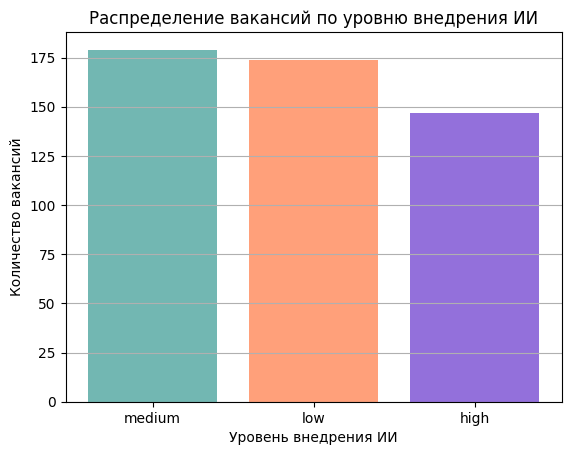

In [58]:
# 1. Гистограмма: количество вакансий по уровням внедрения ИИ
ai_counts = data['ai_adoption_level'].value_counts()

plt.bar(ai_counts.index, ai_counts.values, color=['#72B7B2', '#FFA07A', '#9370DB'])
plt.title("Распределение вакансий по уровню внедрения ИИ")
plt.xlabel("Уровень внедрения ИИ")
plt.ylabel("Количество вакансий")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

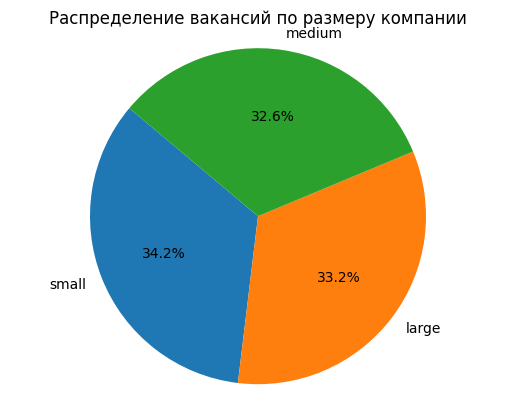

In [59]:
# 2. Круговая диаграмма: распределение по размеру компании
company_sizes = data['company_size'].value_counts()

plt.pie(company_sizes, labels=company_sizes.index, autopct='%1.1f%%', startangle=140)
plt.title("Распределение вакансий по размеру компании")
plt.axis('equal')
plt.show()

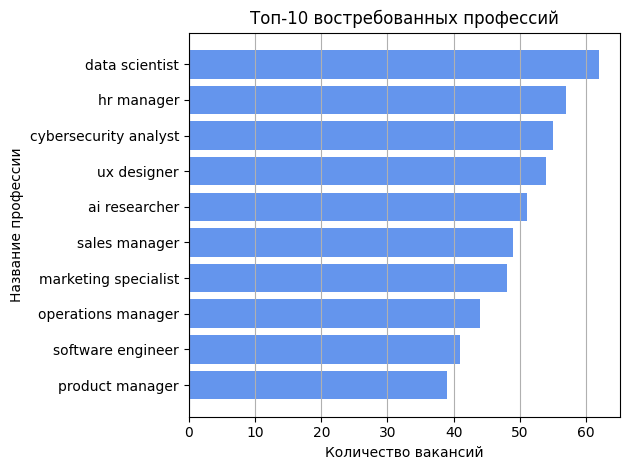

In [60]:
# 3. Гистограмма: наиболее популярные профессии
top_jobs = data['job_title'].value_counts().head(10)

plt.barh(top_jobs.index[::-1], top_jobs.values[::-1], color='#6495ED')
plt.title("Топ-10 востребованных профессий")
plt.xlabel("Количество вакансий")
plt.ylabel("Название профессии")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-81-2601036702.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='location', y='salary_usd', estimator='mean', palette='viridis')


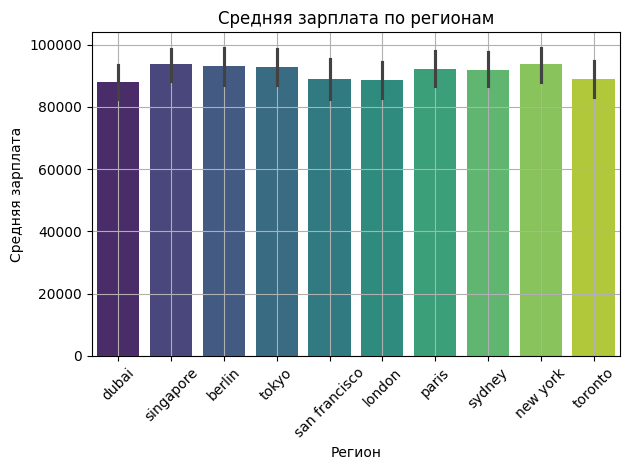

In [81]:
# 4. Barplot: средняя зарплата по регионам
sns.barplot(data=data, x='location', y='salary_usd', estimator='mean', palette='viridis')
plt.title('Средняя зарплата по регионам')
plt.xlabel('Регион')
plt.ylabel('Средняя зарплата')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

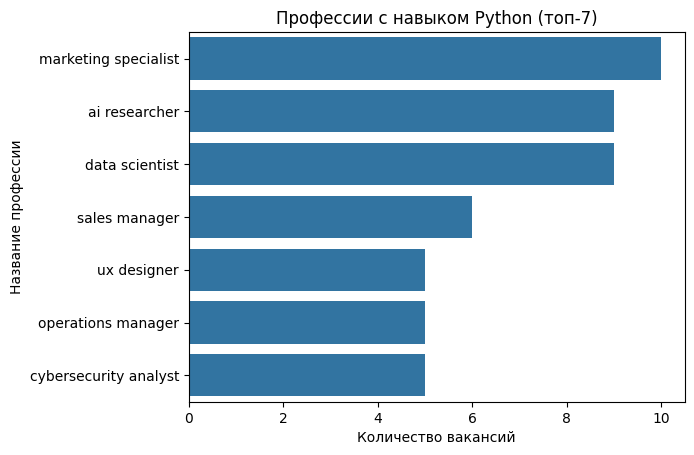

In [68]:
# 5. Countplot: профессии, где упоминается Python
python_jobs = data[data['required_skills'].str.contains('Python', na=False, case=False)]

sns.countplot(y='job_title', data=python_jobs, order=python_jobs['job_title'].value_counts().head(7).index)
plt.title("Профессии с навыком Python (топ-7)")
plt.xlabel("Количество вакансий")
plt.ylabel("Название профессии")
plt.show()

### Этап 2. «Портрет» типичного потребителя

1.  Должность: Data Analyst или AI Engineer

2.  Тип компании: Средняя или крупная

3.  Уровень внедрения ИИ: Средний или высокий

4.  Навыки: Обязательно Python, также желательны SQL и аналитические инструменты

5.  Среда: Работает в цифрово зрелой организации

6.  Перспектива: Высокая востребованность и карьерный рост в ближайшие годы

# **Выводы и рекомендации**

### Этап 1. Краткие итоги

В рамках исследовательской и практической части проекта была проведена полная аналитика на основе датасета "AI-Powered Job Market Insights". Работа включала:

*  Ознакомление с предметной областью (рынок труда и влияние ИИ на профессии)

*  Постановку бизнес-задачи: выявление влияния ИИ на спрос профессий и необходимых навыков

*  Предобработку данных (удаление пропусков, стандартизация, очистка дубликатов)

*  Исследовательский анализ: логическая индексация, группировки, фильтрации, сводные таблицы

*  Графический анализ: построение визуализаций с использованием Matplotlib и Seaborn

### Этап 2. Решение бизнес-задачи

# Цель:
*  Определить, как ИИ влияет на изменения в структуре спроса на профессии и какие навыки остаются наиболее востребованными.

# Вывод:
Да, бизнес-задача была решена. В ходе анализа мы узнали:

*  Какие профессии стали более востребованными (например, Data Analyst, AI Engineer)

*  Какие профессии начинают исчезать или терять популярность (в т.ч. некоторые административные роли)

*  Какие навыки являются «ключевыми» — Python, SQL, Machine Learning

*  Как уровень внедрения ИИ влияет на размер компании и спрос на сотрудников

### Этап 3. Практические рекомендации

# Для компаний:
*  Внедряйте ИИ постепенно, начиная с ключевых бизнес-процессов. Компании с высоким уровнем внедрения ИИ более активно нанимают персонал.

*  Инвестируйте в переквалификацию сотрудников, особенно в направления, связанные с аналитикой и ИИ — спрос на них растёт.

*  Оптимизируйте подбор персонала, ориентируясь на ключевые востребованные навыки (Python, Data Science, аналитика).

#  Для соискателей:
*  Развивайте технические навыки, особенно в области Python, SQL и анализа данных.

*  Следите за трендами: переходите из уязвимых профессий в растущие сегменты.

*  Ищите вакансии в компаниях, активно внедряющих ИИ — они предлагают больше возможностей и рост зарплат.

### Этап 4. Пути дальнейшего развития

1.  Машинное обучение (ML):

  *  Обучение модели для предсказания исчезающих профессий или навыков будущего

  *  Классификация вакансий по вероятности автоматизации

2.  Дашборд (BI-система):

  *  Создание интерактивного дашборда на Plotly Dash или Tableau для HR-аналитики

  *  Отображение вакансий по странам, профессиям, ключевым навыкам

3.  Автоматизация обновления:

  *  Интеграция с API вакансий (например, LinkedIn, Glassdoor) для анализа в реальном времени

4.  Приложение для пользователей:

  *  Создание интерфейса на Tkinter или Streamlit, где пользователь вводит навыки — получает список подходящих профессий и уровень риска автоматизации